In [1]:
############ DATA NOTES ############

# name: abalone
# features: characteristics of abalone appearance
# target: predict the "rings" (age) of the animal, whether young-old

# important metric: both precision and recall should be high (f-score), no false age (low false positives/negatives)

In [2]:
import df_utils as utils
import pandas as pd

In [3]:
############ CONFIGURATION ############

# list desired settings
data_config = {
    "dataset": "abalone",
    "index": None,
    "target": "rings",
    "imbalanced": False,
    "has_test": False,
    "remove_features": True,
}

In [4]:
# import data set
(data, _) = utils.import_data(data_config["dataset"], has_test=data_config["has_test"], raw=True)

importing from: data/data_raw/abalone.csv


In [5]:
############ PRE-PROCESSING ############

# check data types
print(data.dtypes)

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


In [6]:
# set data index
data = utils.set_data_index(data, data_config["index"])

In [7]:
############ TARGET PREPARATION ############

# turn continuous target variable into categories
data["rings"] = pd.cut(data["rings"], bins=[0, 8, 10, float("inf")], labels=["young", "middle", "old"])

In [8]:
############ VISUALIZATION ############

# get quick overview of the data structure
display(data)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,middle
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,middle
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,young
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,old
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,middle
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,middle
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,middle


In [9]:
# get quick overview of data values
utils.get_summary(data)

,dtype,unique,missing,duplicate
sex,object,3,0,0
length,float64,134,0,0
diameter,float64,111,0,0
height,float64,51,0,0
whole_weight,float64,2429,0,0
shucked_weight,float64,1515,0,0
viscera_weight,float64,880,0,0
shell_weight,float64,926,0,0
rings,category,3,0,0


In [10]:
# get quick overview of the numerical data distribution
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


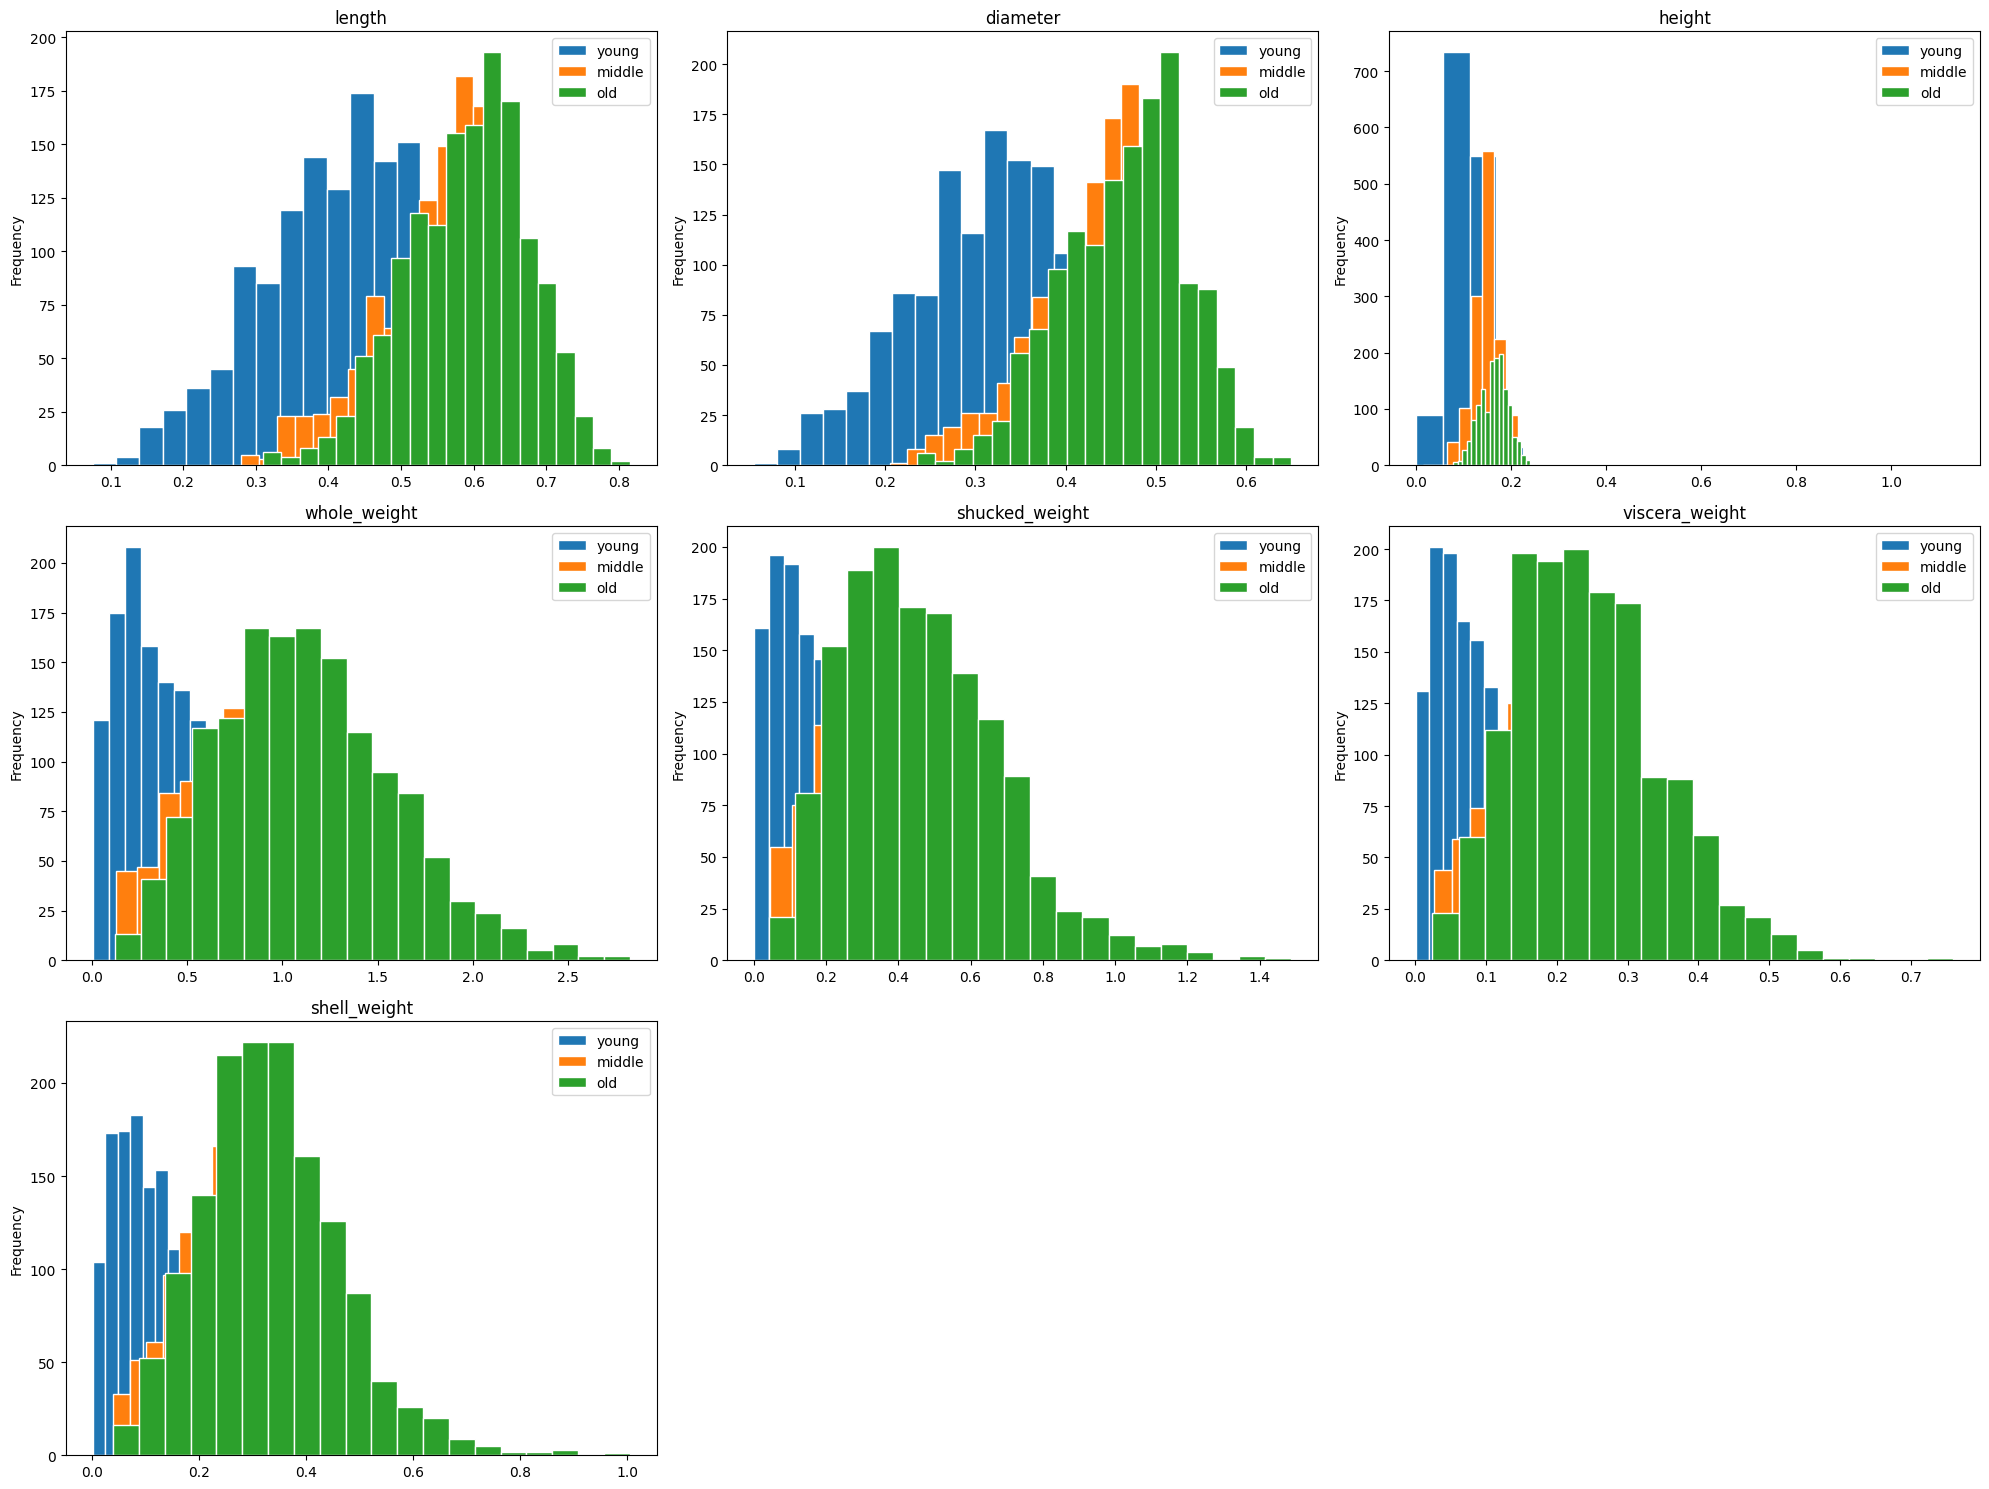

In [11]:
# get quick graphical overview of the numerical data distribution
utils.plot_numerical_data(data, data_config["target"])

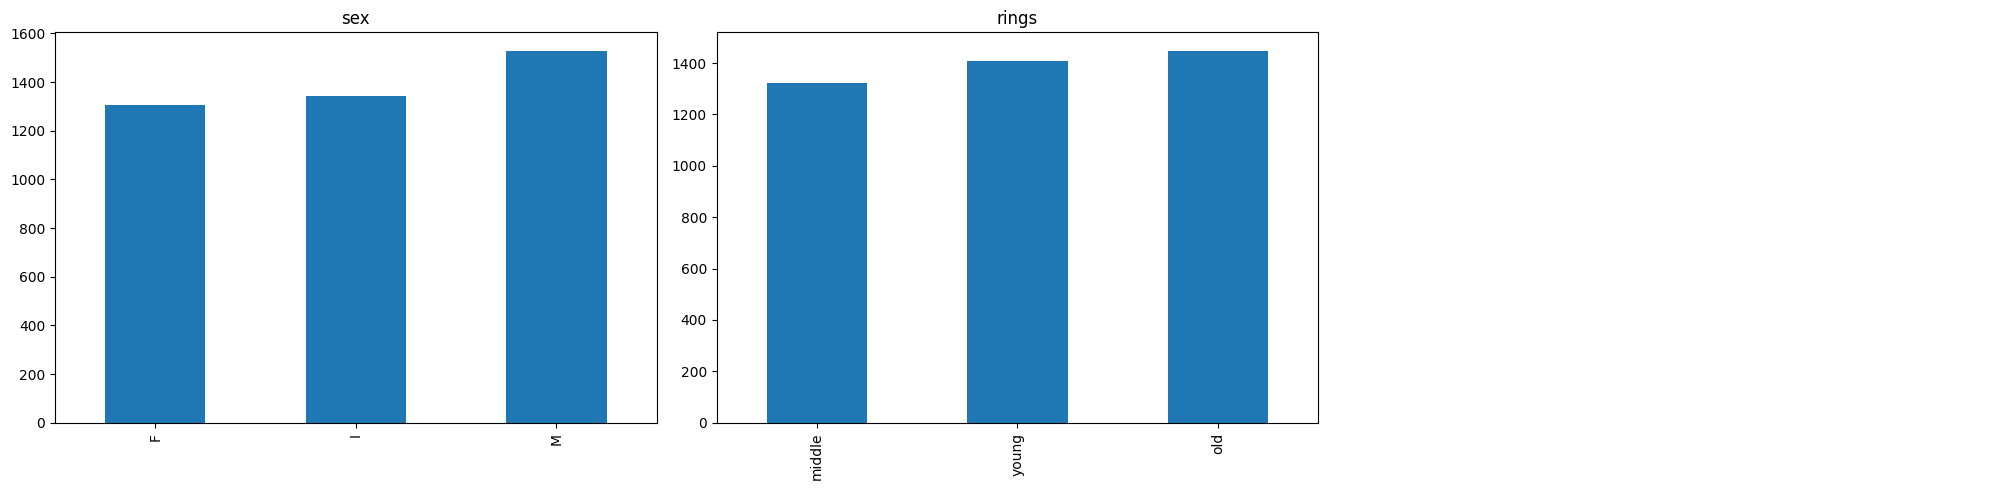

In [12]:
# get a quick graphical overview of the categorical data distribution
utils.plot_categorical_data(data)

In [13]:
############ FEATURE SELECTION ############

# determine correlations between variables
utils.print_correlation_matrix(data)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,rings_young,rings_middle,rings_old
length,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
diameter,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
height,0.83,0.83,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
whole_weight,0.93,0.93,0.82,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
shucked_weight,0.90,0.89,0.77,0.97,nan,nan,nan,nan,nan,nan,nan,nan,nan
viscera_weight,0.90,0.90,0.80,0.97,0.93,nan,nan,nan,nan,nan,nan,nan,nan
shell_weight,0.90,0.91,0.82,0.96,0.88,0.91,nan,nan,nan,nan,nan,nan,nan
sex_F,0.31,0.32,0.30,0.30,0.26,0.31,0.31,nan,nan,nan,nan,nan,nan
sex_I,-0.55,-0.56,-0.52,-0.56,-0.52,-0.56,-0.55,-0.46,nan,nan,nan,nan,nan
sex_M,0.24,0.24,0.22,0.25,0.25,0.24,0.24,-0.51,-0.52,nan,nan,nan,nan


In [14]:
# drop highly correlated and redundant features
if data_config["remove_features"]:
    data = data.drop(data.filter(regex="diameter").columns, axis=1)  # directly related to length
    data = data.drop(data.filter(regex="whole_weight").columns, axis=1)  # directly related to remaining weights

list(data.columns)

['sex',
 'length',
 'height',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings']

In [15]:
# export data set
utils.export_data(data, data_config["dataset"], predict=False)